# Entropic regularized optimal transport

Just an implementation of https://papers.nips.cc/paper/2013/file/af21d0c97db2e27e13572cbf59eb343d-Paper.pdf.

[[0.1 0.  0.  0. ]
 [0.1 0.1 0.  0. ]
 [0.1 0.1 0.1 0. ]
 [0.1 0.1 0.1 0.1]]


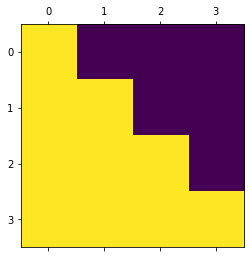

In [71]:
import matplotlib.pyplot
import numpy as np


def ot(r, c, M, lmbda, eps=1e-5):
    K = np.exp(- lmbda * M)
    Kt = np.diag(1 / r.ravel()) @ K

    u = np.ones((len(r), 1)) / len(r)
    lu = u

    converged = False
    while not converged:
        u = 1 / (Kt @ (c[:, np.newaxis] / (K.T @ u)))
        converged = np.sum((u - lu) ** 2) < len(r) * eps
        lu = u

    v = c[:, np.newaxis] / (K.T @ u)
    return u * K * v.T


r = np.asarray([0.1, 0.2, 0.3, 0.4])
c = np.asarray([0.4, 0.3, 0.2, 0.1])
x = np.arange(4)
M = np.abs(np.subtract.outer(x, x))

P = ot(r, c, M, 5)
plt.matshow(P)

print(P.round(3))